# Análise dos dados

Esse trabalho baseia-se em uma pesquisa feita com pessoas LGBTs da europa sobre diversos aspectos da sua vida. Temos 5 tabelas que tratam cada uma sobre um desses aspectos, 1 tabela que possui um overall dos entrevistados e 1 tabela extra que pegamos sobre o IDH desses países na época em que foram feitas as entrevistas (2012).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
# Definindo o tamanho default dos plots
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [3]:
df_SubsetSize = pd.read_csv('Data/cleaned-survey-data-2012/SubsetSize.csv')
df_HDI = pd.read_csv('Data/cleaned-survey-data-2012/HDI_EU-2012.csv')

## 1) Visão geral dos dados

Abaixo encontra-se a tabela que representa o overall dos dados ordenada em ordem decrescente em relação à quantidade de entrevistados (N) por país. As categorias ao lado são referentes a qual subgrupo LGBT a pessoa considera-se pertencente (Mulher lésbica, Homem gay, Mulher bissexual, Homem bissexual e Transgênero). Sem uma análise muito detalhada pode-se perceber que não é bem distribuida a quantidade de entrevistados por país.

In [4]:
df = df_SubsetSize.sort_values('N', ascending=False)
df

,CountryID,N,Lesbian women,Gay men,Bisexual women,Bisexual men,Transgender
0,EU Total,93079,15236,57448,6424,7200,6771
6,DE,20271,2445,13907,590,2000,1329
15,IT,13255,2136,8668,805,996,650
12,FR,8375,1302,5720,326,592,435
27,GB,6759,1285,3795,572,294,813
10,ES,6388,897,4409,354,514,214
11,FI,3439,820,1192,756,190,481
20,NL,3175,614,1937,214,159,251
2,BE,2901,424,1998,132,182,165
21,PL,2790,375,1754,264,138,259


### 1.1) Análise da quantidade de gays e lésbicas

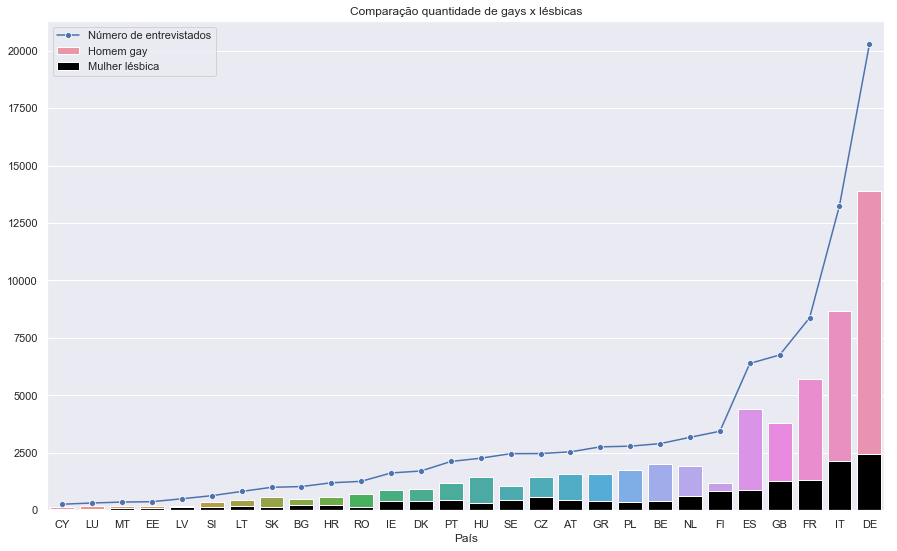

In [5]:
sorted_country = df_SubsetSize.sort_values('N')
sorted_country = sorted_country[:-1]

sns.lineplot(x='CountryID', y='N', marker='o',
                data=sorted_country, label='Número de entrevistados', sort=False)
sns.barplot(x='CountryID', y='Gay men',
                data=sorted_country, label='Homem gay')
sns.barplot(x='CountryID', y='Lesbian women', color="black",
               data=sorted_country, label='Mulher lésbica')

plt.title('Comparação quantidade de gays x lésbicas')
plt.xlabel('País')
plt.ylabel('')
plt.legend()
plt.show()

O gráfico acima representa no gráfico de linhas a quantidade total de entrevistados (eixo y) por país (eixo x). O gráfico de barras colorido representa o número de pessoas que se encaixam na categoria "Homem gay" e o de cor preta as pessoas da categoria "Mulher lésbica".
Com a análise visual do gráfico temos as seguintes conclusões:
- É perceptível que a quantidade de gays é bem alta se analisarmos a quantidade total, quase sempre aparentam estar acima ou perto dos 50% de entrevistados.
- A quantidade de lésbicas demonstra não ter um crescimento tão grande ao se comparar cada país.
- Por causa dos dois pontos acima e por termos um crescimento em relação ao número de entrevistados, percebe-se que a proporção de lésbicas em relação a quantidade de gays é bem variado ao longo do plot dos países.

### 1.2) Análise da quantidade de bissexuais

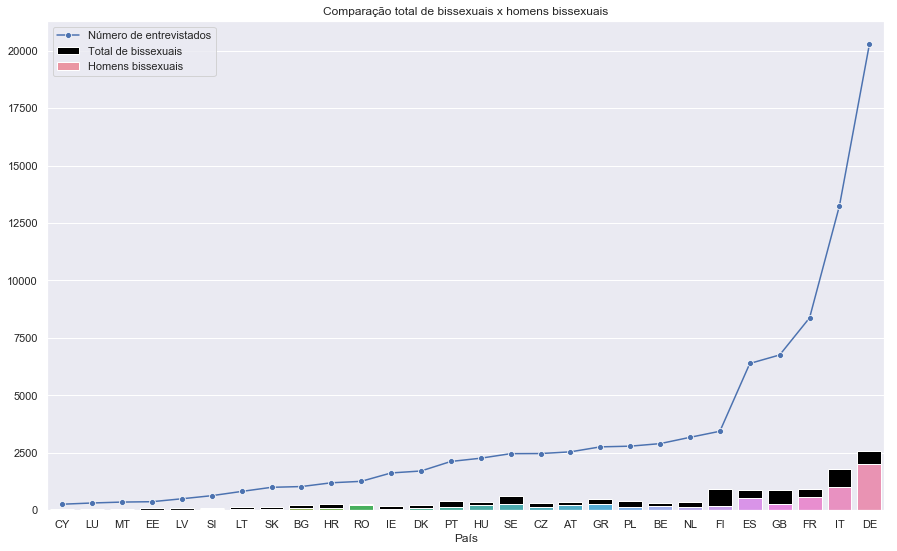

In [6]:
sorted_country_bi = df_SubsetSize.sort_values('N')
sorted_country_bi = sorted_country_bi[:-1]
sorted_country_bi['Bisexual'] = sorted_country_bi['Bisexual men'] + sorted_country_bi['Bisexual women']

sns.lineplot(x='CountryID', y='N', marker='o',
                data=sorted_country_bi, label='Número de entrevistados', sort=False)
sns.barplot(x='CountryID', y='Bisexual', color="black",
                data=sorted_country_bi, label='Total de bissexuais')
sns.barplot(x='CountryID', y='Bisexual men',
               data=sorted_country, label='Homens bissexuais')

plt.title('Comparação total de bissexuais x homens bissexuais')
plt.xlabel('País')
plt.ylabel('')
plt.legend()
plt.show()

O gráfico acima representa no gráfico de linhas a quantidade total de entrevistados (eixo y) por país (eixo x). O gráfico de barras colorido representa o número de pessoas que se encaixam na categoria "Homem bissexual" e o de cor preta o total de pessoas bissexuais ("Homem bissexual" + Mulher bissexual").
Com a análise visual do gráfico temos as seguintes conclusões:
- A quantidade total de bissexuais em relação a quantidade total de entrevistados é baixa.
- Não existe muito um padrão para a porcentagem de homens bissexuais em relação a quantidade total de bissexuais. Para alguns países tem mais da metade, para outros menos e para outros é algo próximo de 50%.

### 1.3) Análise da quantidade de transgêneros

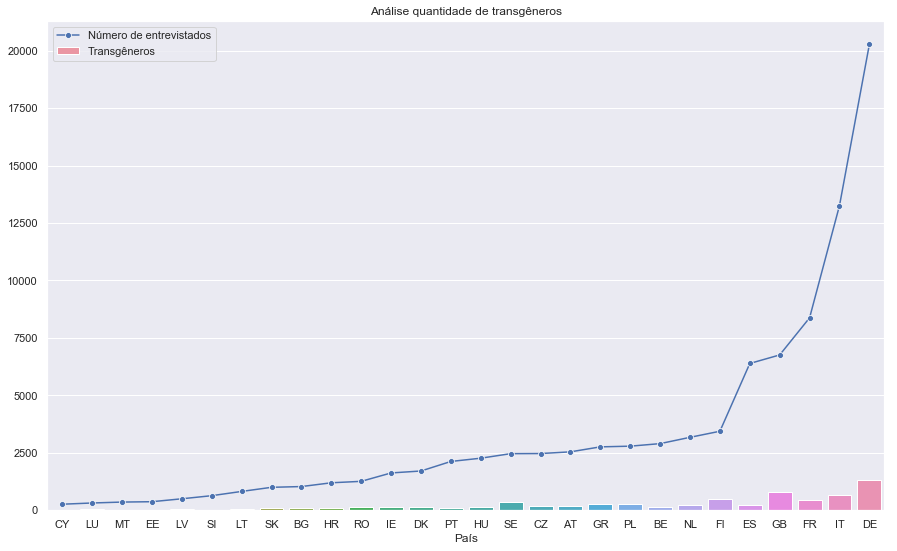

In [7]:
sns.lineplot(x='CountryID', y='N', marker='o',
                data=sorted_country, label='Número de entrevistados', sort=False)
sns.barplot(x='CountryID', y='Transgender',
                data=sorted_country, label='Transgêneros')

plt.title('Análise quantidade de transgêneros')
plt.xlabel('País')
plt.ylabel('')
plt.legend()
plt.show()

O gráfico acima representa no gráfico de linhas a quantidade total de entrevistados (eixo y) por país (eixo x). O gráfico de barras colorido representa o número de pessoas que se encaixam na categoria "Transgêneros". Com a análise visual do gráfico temos as seguintes conclusões:
- A quantidade de transgêneros entrevistados é pequena em todos os países.

### 1.4) Visão geral final

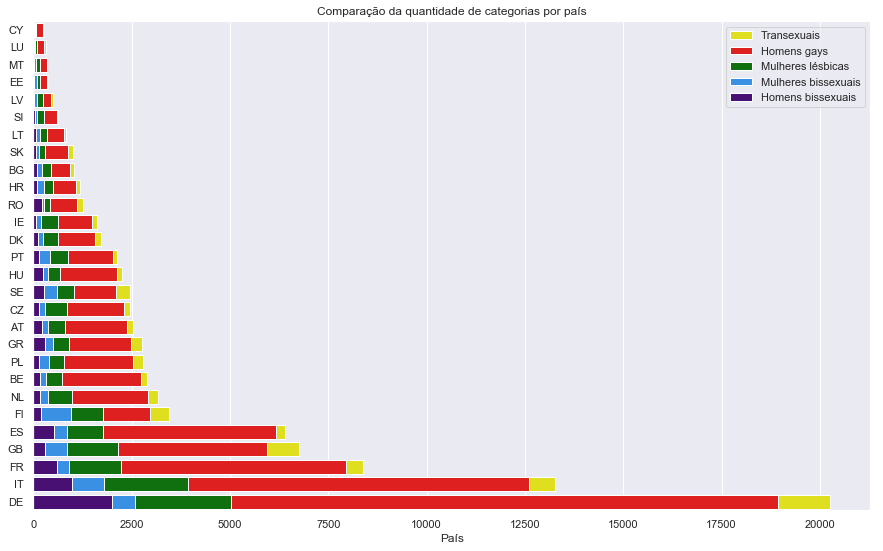

In [8]:
sorted_country_sum = df_SubsetSize.sort_values('N')
sorted_country_sum = sorted_country_sum[:-1]
sorted_country_sum['Bisexual women'] = sorted_country_sum['Bisexual men'] + sorted_country_sum['Bisexual women']
sorted_country_sum['Lesbian women'] = sorted_country_sum['Bisexual women'] + sorted_country_sum['Lesbian women']
sorted_country_sum['Gay men'] = sorted_country_sum['Lesbian women'] + sorted_country_sum['Gay men']
sorted_country_sum['Transgender'] = sorted_country_sum['Gay men'] + sorted_country_sum['Transgender'] 

# sns.lineplot(y='CountryID', x='N', marker='o',
#                 data=sorted_country_sum, label='Número de entrevistados', sort=False)
sns.barplot(y='CountryID', x='Transgender', color="yellow",
                data=sorted_country_sum, label='Transexuais')
sns.barplot(y='CountryID', x='Gay men', color="red",
                data=sorted_country_sum, label='Homens gays')
sns.barplot(y='CountryID', x='Lesbian women', color="green",
                data=sorted_country_sum, label='Mulheres lésbicas')
sns.barplot(y='CountryID', x='Bisexual women', color='dodgerblue',
               data=sorted_country_sum, label='Mulheres bissexuais')
sns.barplot(y='CountryID', x='Bisexual men', color="indigo",
                data=sorted_country_sum, label='Homens bissexuais')

plt.title('Comparação da quantidade de categorias por país')
plt.xlabel('País')
plt.ylabel('')
plt.legend()
plt.show()

Por fim, no gráfico acima, uma visão geral de cada categoria por país. 

## 2) Análise das tabelas de perguntas

São cinco tabelas que tratam sobre os diferentes aspectos da vida do LGBT. Todas elas possuem um formato comum de ContryName (nome do país a que pertence), subset (categoria LGBT que respondeu a pergunta), question_code (código da pergunta que está sendo feita), question_label (a pergunta sendo feita), answer (a resposta para a pergunta), percentage (a porcentagem de pessoas desse país nessa categoria que deram essa resposta para essa pergunta) e CountryID (id do país).

### 2.1) Daily Life

Esse conjunto de 50 perguntas trata sobre o dia a dia do LGBT em seu país. Algumas perguntas como: "Quão comum é ver parceiros de mesmo sexo dando as mãos em público no país que você vive?", "O que te permitiria sentir mais confortável vivendo como uma lésbica, gay ou bissexual no país onde você vive?" ou "Quantas pessoas na sua família (fora seu parceiro) sabem que você é L, G, B ou T?" são exemplos do que encontramos na tabela de Daily Life.

In [9]:
df_DailyLife = pd.read_csv('Data/cleaned-survey-data-2012/DailyLife.csv')
df_DailyLife.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,AT
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,AT
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,AT
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,AT
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4.0,AT


### 2.2) Discrimination

Esse conjunto de 32 perguntas é sobre como os LGBTs veem a discriminação por serem LGBT em seu país. Perguntas como: "Nos últimos 12 meses, no país que você vive, se sentiu discriminado ou assediado devido à sua orientação sexual?", "No seu últimos 5 anos de empregado, já escutou ou viu comentários ou condutas negativas porque algum colega de trabalho é conhecido por ser L, G, B e/ou T?" ou "Durante a época da escola, antes dos seus 18 anos, você escondia ou disfarçava que você era L, G, B ou T?" são exemplos do que encontramos na tabela Discrimination.

In [10]:
df_Discrim = pd.read_csv('Data/cleaned-survey-data-2012/Discrimination.csv')
df_Discrim.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,c10,Have you ever experienced any of the following...,Difficulty in gaining access to healthcare,2.0,AT
1,Austria,Lesbian,c10,Have you ever experienced any of the following...,Having to change general practitioners or othe...,8.0,AT
2,Austria,Lesbian,c10,Have you ever experienced any of the following...,Receiving unequal treatment when dealing with ...,3.0,AT
3,Austria,Lesbian,c10,Have you ever experienced any of the following...,Foregoing treatment for fear of discrimination...,5.0,AT
4,Austria,Lesbian,c10,Have you ever experienced any of the following...,Specific needs ignored (not taken into account),12.0,AT


### 2.3) Rights Awareness

Esse conjunto de 10 perguntas tratam sobre o conhecimento que os LGBTs tem dos seus direitos em seu país. Perguntas como: "Até onde você sabe, no país onde mora, casais de mesmo sexo podem se casar legalmente e/ou ter parceiros registrados?", "Você já viu no seu país algum programa ou campanha de conscientização feito ou pelo governo ou por uma organização não governamental sobre discriminação contra pessoas gays, lésbicas ou bissexuais?" ou "No país em que você vive, existe alguma lei que proiba a discriminação contra pessoas por causa da sua identidade de gênero na hora de candidatar para uma vaga de emprego?" são exemplos do que encontramos na tabela Rights Awareness.

In [11]:
df_RightsAwar = pd.read_csv('Data/cleaned-survey-data-2012/RightsAwareness.csv')
df_RightsAwar.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Yes,53.0,AT
1,Austria,Lesbian,d1,"In the country where you live, is there a law ...",No,10.0,AT
2,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Don`t know,37.0,AT
3,Austria,Gay,d1,"In the country where you live, is there a law ...",Yes,45.0,AT
4,Austria,Gay,d1,"In the country where you live, is there a law ...",No,16.0,AT


### 2.4) Violence and Harassment

Esse conjunto de 47 perguntas tratam sobre violência e assédio que os LGBTs sofreram. Perguntas como: "Você evita dar as mãos em público com um parceiro do mesmo sexo por medo de ser agredido, ameaçado ou assediado?", "Nos últimos 5 anos, você foi: agredido fisicamente / sexualmente ou ameaçado de violência em casa ou em qualquer outro lugar (rua, transporte público, local de trabalho etc.) por qualquer motivo?" ou "Você acha que o incidente MAIS SÉRIO de assédio aconteceu parcial ou completamente porque você foi visto como L, G, B ou T?" são exemplos do que encontramos na tabela Violence and Harrassment.

In [12]:
df_ViolHaras = pd.read_csv('Data/cleaned-survey-data-2012/ViolenceAndHarrassment.csv')
df_ViolHaras.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33.0,AT
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53.0,AT
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12.0,AT
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2.0,AT
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51.0,AT


### 2.5) Transgender Specific Questions

Esse conjunto de 23 perguntas são específicas para pessoas transgêneras. Perguntas como: "Você já procurou ajuda psicológica ou médica por ser uma pessoa trans?", "Você foi ao exterior ou considerou ir ao exterior para tratamento médico para alterar sua aparência física, incluindo a compra de hormônios pela Internet de outros países?" ou "Até onde você sabe, no país em que vive, uma pessoa pode alterar seus documentos oficiais para corresponder ao gênero que se identifica?" são exemplos do que encontramos na tabela Trangender Specific Questions.

In [13]:
df_TransSpecQ = pd.read_csv('Data/cleaned-survey-data-2012/TransgenderSpecificQuestions.csv')
df_TransSpecQ.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,Yes,35.0,AT
1,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,No,60.0,AT
2,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,Don`t know,5.0,AT
3,Belgium,Transgender,tr1,Have you ever sought psychological or medical ...,Yes,48.0,BE
4,Belgium,Transgender,tr1,Have you ever sought psychological or medical ...,No,37.0,BE
